In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [ ]:
dataset = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [ ]:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
dataset.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [ ]:
dataset.shape

(5110, 12)

In [ ]:
dataset.duplicated().sum()


0

In [ ]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
import missingno as msno

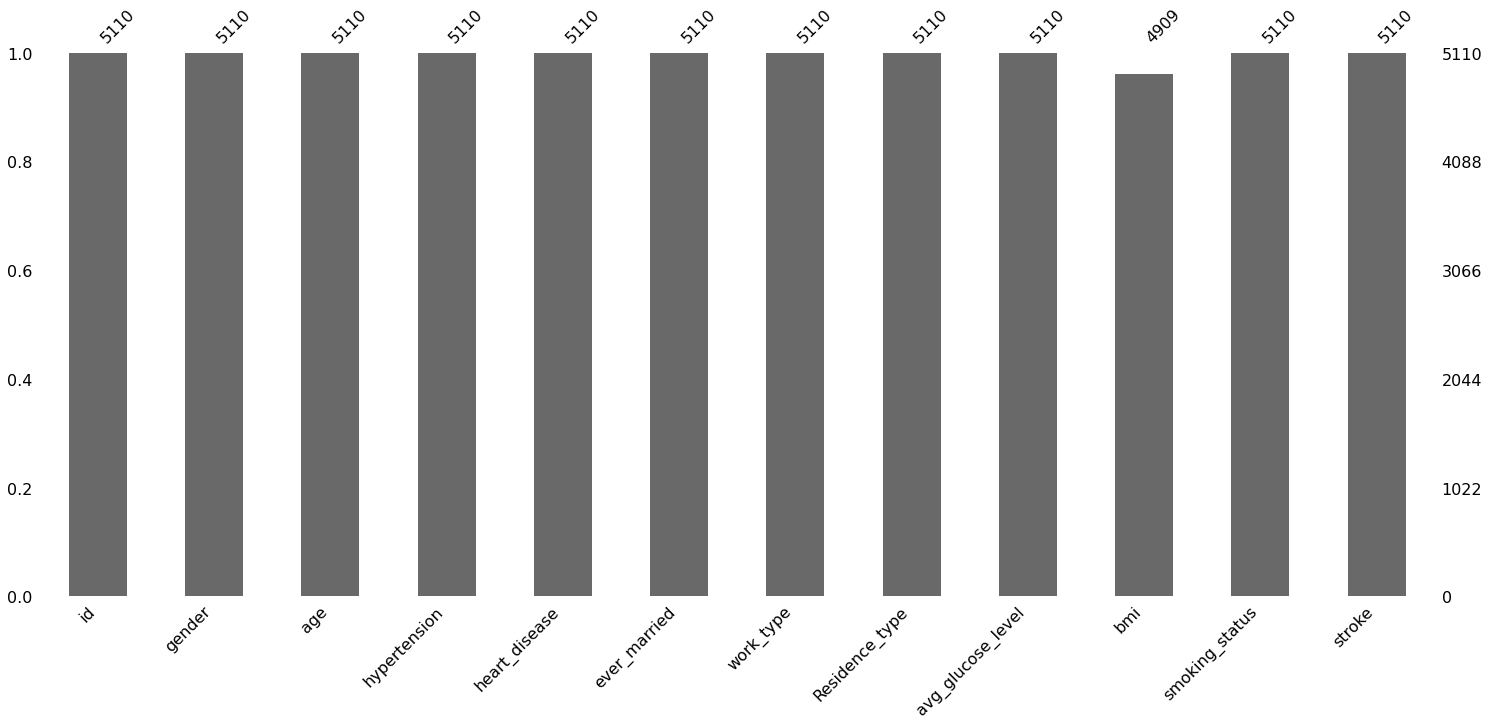

In [ ]:
msno.bar(dataset)
plt.show()

In [ ]:
dataset.isnull().mean() * 100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [ ]:
dataset = dataset.dropna(subset=['bmi'])

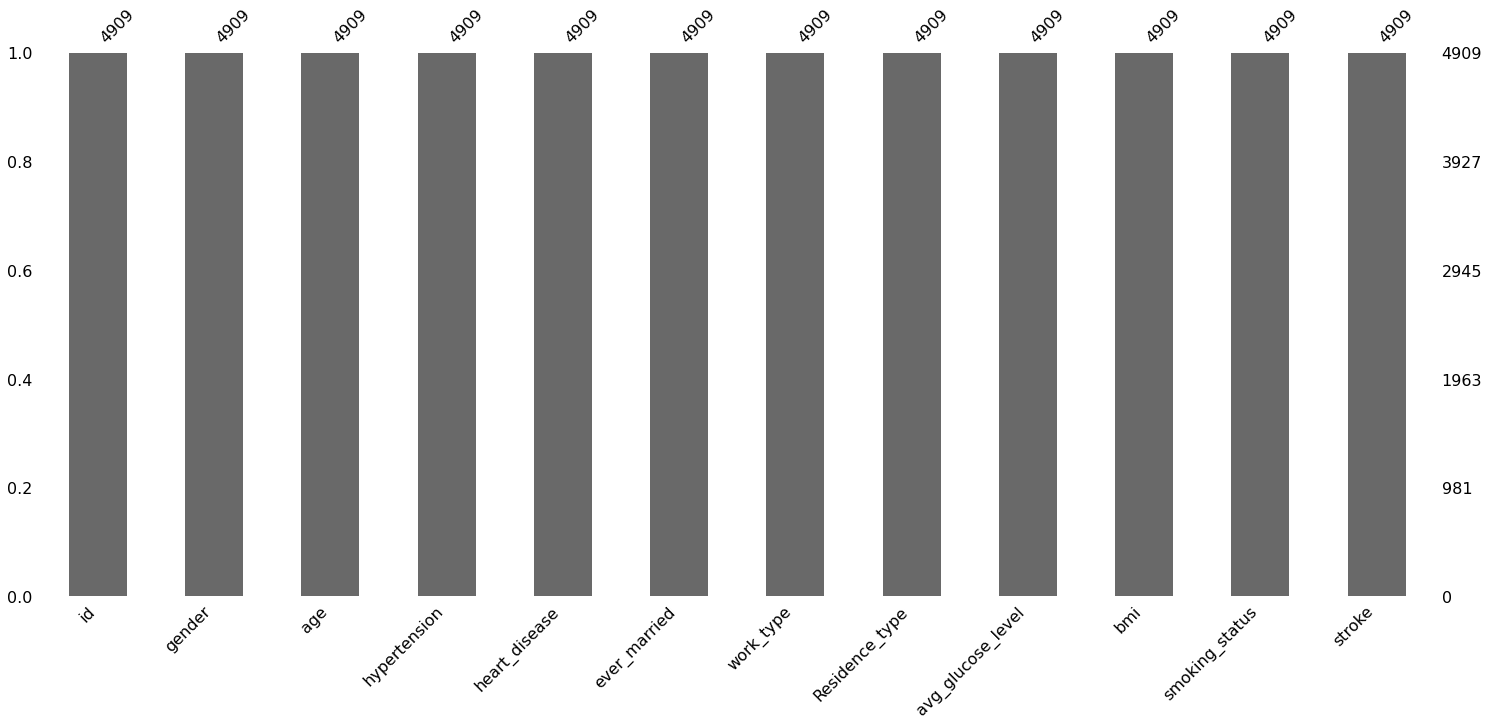

In [ ]:
msno.bar(dataset)
plt.show()

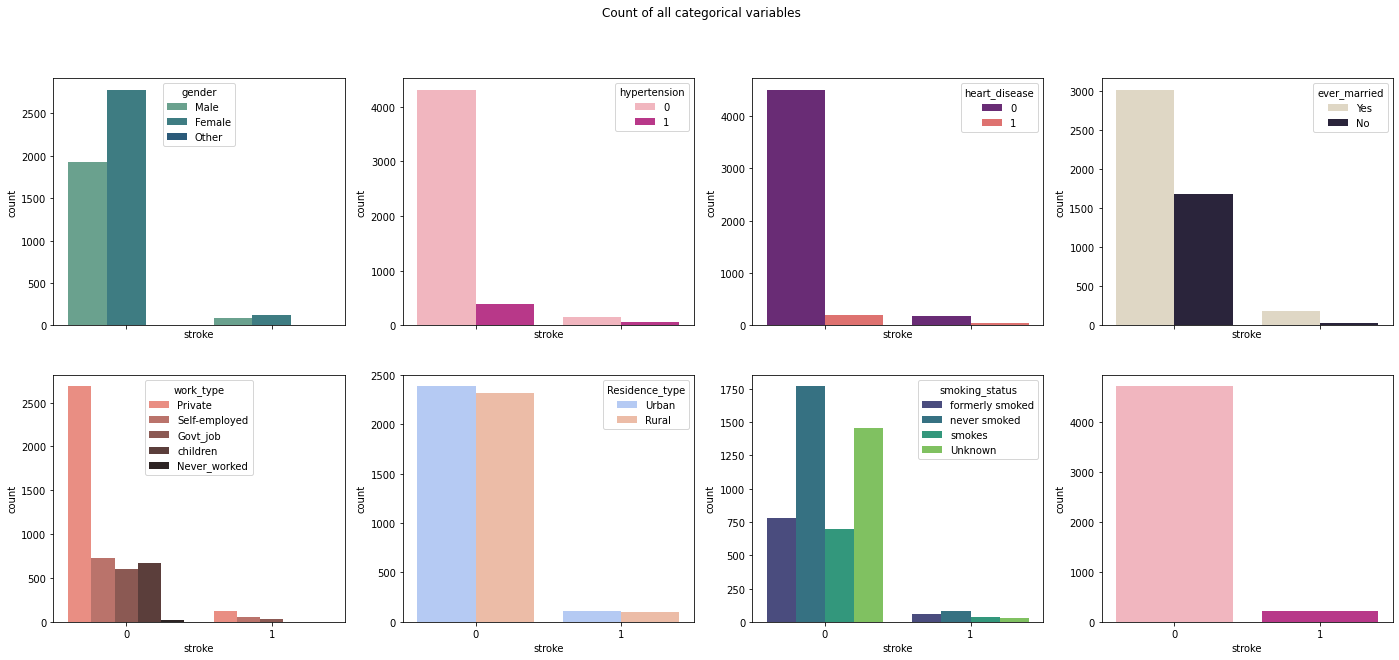

In [ ]:
fig, axes = plt.subplots(2, 4, sharex=True, figsize=(24,10))
fig.suptitle('Count of all categorical variables')
sns.countplot(ax=axes[0, 0], data=dataset, x='stroke',hue = 'gender',palette='crest')
sns.countplot(ax=axes[0, 1], data=dataset, x='stroke',hue='hypertension',palette='RdPu')
sns.countplot(ax=axes[0, 2], data=dataset, x='stroke',hue = 'heart_disease',palette='magma')
sns.countplot(ax=axes[0, 3], data=dataset, x='stroke',hue = 'ever_married',palette="ch:s=-.2,r=.6")
sns.countplot(ax=axes[1,0],data = dataset, x ='stroke' ,hue = 'work_type',palette="dark:salmon_r")
sns.countplot(ax=axes[1,1],data = dataset, x ='stroke',hue='Residence_type',palette="coolwarm" )
sns.countplot(ax=axes[1,2],data = dataset, x ='stroke',hue='smoking_status',palette='viridis' )
sns.countplot(ax=axes[1,3],data = dataset, x ='stroke',palette='RdPu' )
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


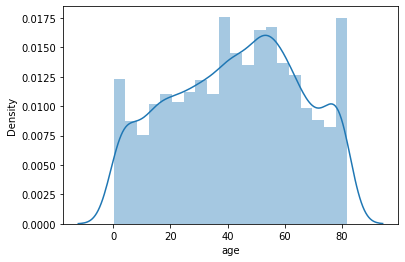

In [ ]:
sns.distplot(dataset['age'])
plt.show()

In [ ]:
df = pd.DataFrame(dataset)

In [ ]:
name = df['avg_glucose_level'].head(12)
price = df['age'].head(12)

In [ ]:
fig = plt.figure(figsize =(10, 7))

<Figure size 720x504 with 0 Axes>

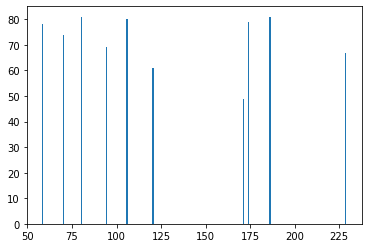

In [ ]:
# Horizontal Bar Plot
plt.bar(name[0:10], price[0:10])

# Show Plot
plt.show()


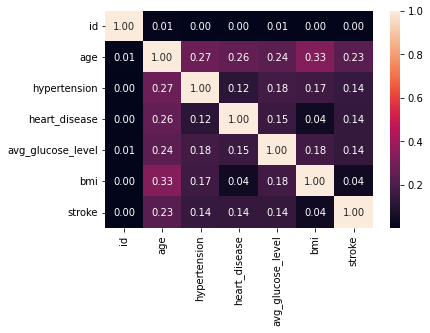

In [ ]:
sns.heatmap(dataset.corr(), annot=True, fmt='.2f')

In [ ]:
df['avg_glucose_level'].mean()

105.3051497249949

In [ ]:
df['avg_glucose_level'].std()

44.42434066091561

In [ ]:
import statistics
print(statistics.median(df['avg_glucose_level']))

91.68


In [ ]:
df['avg_glucose_level'].var()

1973.5220431570804

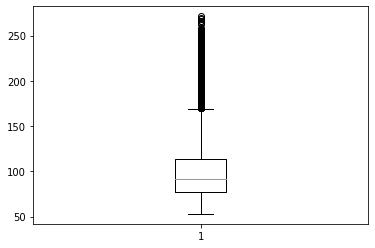

In [ ]:
y = np.random.normal(df['avg_glucose_level'])
plt.boxplot(y)
plt.show()

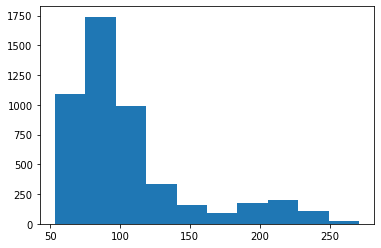

In [ ]:
x = np.random.normal(df['avg_glucose_level'])
plt.hist(x)
plt.show()

In [ ]:

#split dataset in features and target variable
feature_cols = ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
X = dataset[feature_cols] # Features
y = dataset.stroke # Target variable